In [2]:
#hide
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
fastbook??

Type:        module
String form: <module 'fastbook' from '/home/jyoon/conda3/envs/fastai20/lib/python3.6/site-packages/fastbook/__init__.py'>
File:        ~/conda3/envs/fastai20/lib/python3.6/site-packages/fastbook/__init__.py
Source:     
__version__ = "0.0.16"
import matplotlib as mpl, pkgutil, requests, time
from fastai.vision.all import *
from pandas.api.types import CategoricalDtype
from scipy.cluster import hierarchy as hc
from io import StringIO, BytesIO
from urllib.error import URLError,HTTPError

try: from ipywidgets import widgets
except ModuleNotFoundError: warn("Missing `ipywidgets` - please install it")
try: import sentencepiece
except ModuleNotFoundError: warn("Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`")
try: from nbdev.showdoc import *
except ModuleNotFoundError: warn("Missing `nbdev` - please install it")
try:
    import graphviz
    from sklearn.tree import export_graphviz
except ModuleNotFoundError: warn("Missing `graphviz` - please run

In [3]:
#hide
from fastbook import *

# Image Classification

## From Dogs and Cats to Pet Breeds

In [4]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/home/jyoon/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/jyoon/.fastai/data/oxford-iiit-pet/images')]

#### memo:     
untar_data() downloads data files to Colab Session Storage.  
Is gone after instance in close on Colab cloud.  
Unix "tar" command, compressed and uncompressed data files.  

https://www.robots.ox.ac.uk/~vgg/data/pets/  
Oxford Univ Geometry Group and Indian Inst I & Tech.  
Curated data on dogs and cats breeds.  Some are confusing even for humans to identify.  
Manually download to repo on C drive.  Move to Ubuntu and untar (uncompress).  Explore.  

In [5]:
path?


Type:        PosixPath
String form: /home/jyoon/.fastai/data/oxford-iiit-pet
File:        ~/conda3/envs/fastai20/lib/python3.6/pathlib.py
Docstring:  
Path subclass for non-Windows systems.

On a POSIX system, instantiating a Path should return this object.


Type:        PosixPath
String form: /root/.fastai/data/oxford-iiit-pet
File:        /usr/lib/python3.6/pathlib.py
Docstring:  
Path subclass for non-Windows systems.

#### memo:  
data download to:  
   String form: /home/jyoon/.fastai/data/oxford-iiit-pet  
pathlib.py Python file in:  
   File: ~/conda3/envs/fastai20/lib/python3.6/pathlib.py  

#### memo:  

.fastai folder, dot-folder, is a hidden cash location for date file, temporary storage.  

This naming convention comes from Unix-like operating systems (such as Linux or OSX) where it means a hidden file or directory. It works anywhere, but its primary use is to hide configuration files in your home directory (i.e. ~/. cache/ or ~/. plan) They are frequently called dot files.

#### memo: 
pathlib.py symbolically manipulates drive path.  
path.parts() - separates parts out for Winows or Unix OS.  
```
>>> p = PurePath('/usr/bin/python3')
>>> p.parts
('/', 'usr', 'bin', 'python3')

>>> p = PureWindowsPath('c:/Program Files/PSF')
>>> p.parts
('c:\\', 'Program Files', 'PSF')

Usage: 
from pathlib import Path 
>>> p = Path('.')  # current directory
>>> [x for x in p.iterdir() if x.is_dir()]  # lists all directories in tree. 
```

In [6]:
#hide
Path.BASE_PATH = path

In [7]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [8]:
(path/"images").ls()

(#7393) [Path('images/Abyssinian_1.jpg'),Path('images/Abyssinian_10.jpg'),Path('images/Abyssinian_100.jpg'),Path('images/Abyssinian_100.mat'),Path('images/Abyssinian_101.jpg'),Path('images/Abyssinian_101.mat'),Path('images/Abyssinian_102.jpg'),Path('images/Abyssinian_102.mat'),Path('images/Abyssinian_103.jpg'),Path('images/Abyssinian_104.jpg')...]

In [9]:
Path.BASE_PATH?

Type:        PosixPath
String form: /home/jyoon/.fastai/data/oxford-iiit-pet
File:        ~/conda3/envs/fastai20/lib/python3.6/pathlib.py
Docstring:  
Path subclass for non-Windows systems.

On a POSIX system, instantiating a Path should return this object.


In [30]:
fname = (path/"images").ls()[1000]

In [31]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['British_Shorthair']

In [21]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

In [22]:
dls?

Type:        DataLoaders
String form: <fastai.data.core.DataLoaders object at 0x7fdc99de6780>
File:        ~/conda3/envs/fastai20/lib/python3.6/site-packages/fastai/data/core.py
Docstring:   Basic wrapper around several `DataLoader`s.


In [24]:
dls??

Type:        DataLoaders
String form: <fastai.data.core.DataLoaders object at 0x7fdc99de6780>
File:        ~/conda3/envs/fastai20/lib/python3.6/site-packages/fastai/data/core.py
Source:     
class DataLoaders(GetAttr):
    "Basic wrapper around several `DataLoader`s."
    _default='train'
    def __init__(self, *loaders, path='.', device=None):
        self.loaders,self.path = list(loaders),Path(path)
        if device is not None or hasattr(loaders[0],'to'): self.device = device

    def __getitem__(self, i): return self.loaders[i]
    def new_empty(self):
        loaders = [dl.new(dl.dataset.new_empty()) for dl in self.loaders]
        return type(self)(*loaders, path=self.path, device=self.device)

    def _set(i, self, v): self.loaders[i] = v
    train   ,valid    = add_props(lambda i,x: x[i], _set)
    train_ds,valid_ds = add_props(lambda i,x: x[i].dataset)

    @property
    def device(self): return self._device

    @device.setter
    def device(self, d):
        for dl in self.

## Presizing

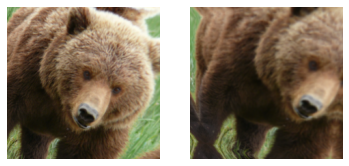

In [27]:
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))
dls1 = dblock1.dataloaders([(Path.cwd()/'images'/'grizzly.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);

#### memo:  
First copy grizzly.jpg to "./images/grizzly.jpg" of working directory. 


### Checking and Debugging a DataBlock

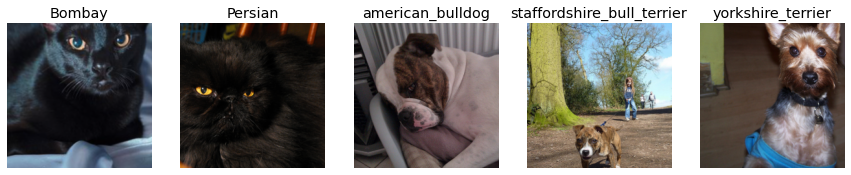

In [37]:
dls.show_batch(nrows=1, ncols=5)

In [38]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/jyoon/.fastai/data/oxford-iiit-pet/images/pomeranian_138.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=300x203
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/jyoon/.fastai/data/oxford-iiit-pet/images/pomeranian_138.jpg
    applying partial gives
      pomeranian
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(28)

Final sample: (PILImage mode=RGB size=300x203, TensorCategory(28))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting

RuntimeError: stack expects each tensor to be equal size, but got [3, 203, 300] at entry 0 and [3, 500, 364] at entry 1

#### memo:   
Need to make images equal size and square before calling DataLoaders.
   RuntimeError: stack expects each tensor to be equal size, but got [3, 203, 300] at entry 0 and [3, 500, 364] at entry 1   

In [41]:
pets2 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
pets2.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/jyoon/.fastai/data/oxford-iiit-pet/images/pomeranian_138.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=300x203
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/jyoon/.fastai/data/oxford-iiit-pet/images/pomeranian_138.jpg
    applying partial gives
      pomeranian
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(28)

Final sample: (PILImage mode=RGB size=300x203, TensorCategory(28))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting

In [42]:
pets2?

Type:        DataBlock
String form: <fastai.data.block.DataBlock object at 0x7fdc8d093828>
File:        ~/conda3/envs/fastai20/lib/python3.6/site-packages/fastai/data/block.py
Docstring:   Generic container to quickly build `Datasets` and `DataLoaders`


In [45]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/jyoon/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.493992,0.363037,0.110961,24:16


epoch,train_loss,valid_loss,error_rate,time
0,0.497692,0.300570,0.098106,29:17
1,0.322019,0.214786,0.069012,28:58


#### memo:  
Finally finished on CPU!  Took about 1.5 hr.  
Book shows GPU train time about 1 minute.  

## Cross-Entropy Loss

### Viewing Activations and Labels

In [46]:
x,y = dls.one_batch()

In [47]:
y

TensorCategory([ 6,  7, 28, 22, 36, 13, 29, 31,  4,  8, 28,  6, 14, 29,  5,  3, 20,  9, 28,  0,  5, 17,  5,  8, 25,  2,  3, 33, 21,  2, 21, 22, 12, 21, 20, 31,  6, 36,  5, 25, 19,  7,  1,  7,  1, 34, 13, 26,
        17, 30, 19, 15, 26, 31,  5,  7, 13, 10, 15,  9, 28, 11, 33,  0])

In [48]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([1.0506e-03, 1.7489e-03, 9.4083e-07, 1.5288e-05, 1.0644e-05, 9.7250e-05, 9.9653e-01, 3.7880e-06, 2.7178e-04, 6.7384e-05, 8.7839e-07, 2.0003e-06, 1.8949e-07, 1.0580e-07, 3.7471e-05, 5.1835e-06,
        9.7813e-07, 4.3448e-07, 7.5677e-06, 5.0294e-05, 2.5551e-06, 2.5858e-06, 7.5209e-06, 2.3444e-07, 2.5985e-07, 3.2015e-05, 5.9409e-07, 6.9747e-06, 1.2628e-06, 8.3206e-08, 2.1321e-06, 9.7237e-07,
        2.2779e-06, 1.9979e-06, 6.7517e-09, 3.0331e-05, 2.6048e-06])

In [49]:
len(preds[0]),preds[0].sum()

(37, tensor(1.))

### Softmax

/home/jyoon/conda3/envs/fastai20/lib/python3.6/site-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370140761/work/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


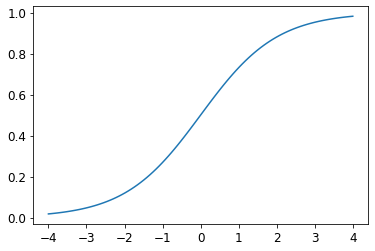

In [50]:
plot_function(torch.sigmoid, min=-4,max=4)

In [51]:
#hide
torch.random.manual_seed(42);

In [52]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [53]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [54]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [55]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

### Log Likelihood

In [56]:
targ = tensor([0,1,0,1,1,0])

In [57]:
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [58]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [59]:
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['loss'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

3,7,targ,idx,loss
0.602469,0.397531,0,0,0.602469
0.502065,0.497935,1,1,0.497935
0.133188,0.866811,0,2,0.133188
0.996640,0.003360,1,3,0.003360
0.595949,0.404051,1,4,0.404051
0.366118,0.633882,0,5,0.366118


In [60]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [61]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

### Taking the Log

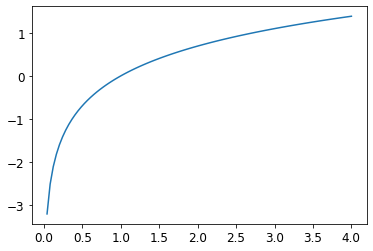

In [62]:
plot_function(torch.log, min=0,max=4)

In [63]:
loss_func = nn.CrossEntropyLoss()

In [64]:
loss_func(acts, targ)

tensor(1.8045)

In [65]:
F.cross_entropy(acts, targ)

tensor(1.8045)

In [66]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

## Model Interpretation

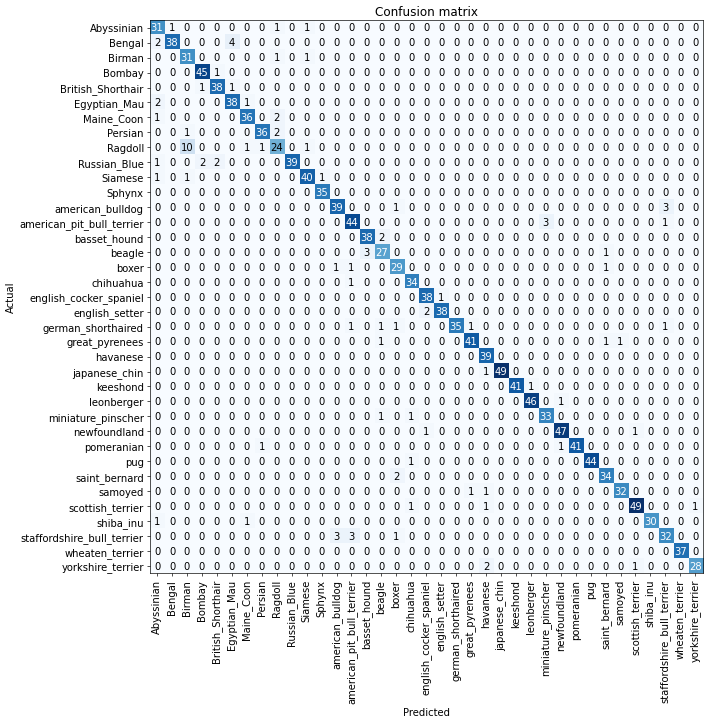

In [67]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [69]:
interp.most_confused(min_val=3)

[('Ragdoll', 'Birman', 10),
 ('Bengal', 'Egyptian_Mau', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'miniature_pinscher', 3),
 ('beagle', 'basset_hound', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3)]

## Improving Our Model

### The Learning Rate Finder

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

### Unfreezing and Transfer Learning

In [70]:
learn.fine_tune??

Signature:
learn.fine_tune(
    epochs,
    base_lr=0.002,
    freeze_epochs=1,
    lr_mult=100,
    pct_start=0.3,
    div=5.0,
    lr_max=None,
    div_final=100000.0,
    wd=None,
    moms=None,
    cbs=None,
    reset_opt=False,
)
Source:   
@patch
@delegates(Learner.fit_one_cycle)
def fine_tune(self:Learner, epochs, base_lr=2e-3, freeze_epochs=1, lr_mult=100,
              pct_start=0.3, div=5.0, **kwargs):
    "Fine tune with `freeze` for `freeze_epochs` then with `unfreeze` from `epochs` using discriminative LR"
    self.freeze()
    self.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99, **kwargs)
    base_lr /= 2
    self.unfreeze()
    self.fit_one_cycle(epochs, slice(base_lr/lr_mult, base_lr), pct_start=pct_start, div=div, **kwargs)
File:      ~/conda3/envs/fastai20/lib/python3.6/site-packages/fastai/callback/schedule.py
Type:      method


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max=1e-5)

### Discriminative Learning Rates

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

In [ ]:
learn.recorder.plot_loss()

### Selecting the Number of Epochs

### Deeper Architectures

In [ ]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

## Conclusion

## Questionnaire

1. Why do we first resize to a large size on the CPU, and then to a smaller size on the GPU?
   * ans: to get squares. PyTorch uses square images.  
1. If you are not familiar with regular expressions, find a regular expression tutorial, and some problem sets, and complete them. Have a look on the book's website for suggestions.
   * ans: do more exercises.  re.py
1. What are the two ways in which data is most commonly provided, for most deep learning datasets?
   * ans: individual files where each file is a data item, such as images, with file names perhaps indicate organization.  
     Tabular format (csv) where each row is a data item, with possible names associated with image or document files.  
     Can also be binary format files, for large dump, such as medical imaging data.  
1. Look up the documentation for `L` and try using a few of the new methods is that it adds.
   * ans: L is a fastai function, builds on PyTorch nn.convolutions object? 
1. Look up the documentation for the Python `pathlib` module and try using a few methods of the `Path` class.
   * ans: symbolic directory path manipulation. https://docs.python.org/3/library/pathlib.html
   
1. Give two examples of ways that image transformations can degrade the quality of the data.
   * ans: interpolated image can become fuzzy, can have unrelated artifacts (parts of image missing or taken over by other objects)
1. What method does fastai provide to view the data in a `DataLoaders`?
   * ans: ?
1. What method does fastai provide to help you debug a `DataBlock`?
   * ans: stepping through, debug. 
1. Should you hold off on training a model until you have thoroughly cleaned your data? 
   * ans: No, train as soon as possible.  Use trained model to look for error in data. Exp. unique()
1. What are the two pieces that are combined into cross-entropy loss in PyTorch?
   * ans: 
1. What are the two properties of activations that softmax ensures? Why is this important?
   * ans: vanishing weights, so later layers will continue to improve learning. 
   * ? 
1. When might you want your activations to not have these two properties?
1. Calculate the `exp` and `softmax` columns of <<bear_softmax>> yourself (i.e., in a spreadsheet, with a calculator, or in a notebook). 
   * Later -- do. 
1. Why can't we use `torch.where` to create a loss function for datasets where our label can have more than two categories?
   * ans: We can, but use one-hot encoding to specifiy multiclass (dummy) variables. 
1. What is the value of log(-2)? Why?
   * ans: 2e^(i*pi) in Complex Number space, but undefined in Real Number space. 
1. What are two good rules of thumb for picking a learning rate from the learning rate finder? 
   * ans: 1/c ?  Hightest slope decline in accuracy.
1. What two steps does the `fine_tune` method do?
   * ans: trains the randomly added final layer for one epoch 
        Unfreeze all layers and train all of them for the N epoches requested. 
1. In Jupyter Notebook, how do you get the source code for a method or function?
   * ans: ??  function??  
1. What are discriminative learning rates?
   * ans: Use varying rate in layers, depending on user data concordance with trained model data. Usually earier layers train on primative shapes and can be readily transferred to user's data, but later layers learn complex shapes that does not transfer well to user's untrained data. 
1. How is a Python `slice` object interpreted when passed as a learning rate to fastai?
   * ans: start number, end number, interpolate between with geometric growth. learning rate starts low at initial layer, that is already well trained, and gets high towards final layer that has not been trained (our data).
1. Why is early stopping a poor choice when using 1cycle training? 
   * ans: final random layer has not had enough epoches to get accurate.  
1. What is the difference between `resnet50` and `resnet101`?  
   * ans: more layers. pre-trained models for imagenet database is available for standard number of layers. restnet18 and resnet34 are smaller and good to start with. larger ones are good for trying to improve accuracy. 
1. What does `to_fp16` do?  
   * ans: reduce byte size to floating point 16bit precision, rounds numbers, reduce memory usage.

#### Regular Expression  
re.search()  
re.sub  #substitutes  
re.finall  
re.match  
* one or more match  
? one or zero match  
https://learnbyexample.github.io/python-regex-cheatsheet/   

### Further Research

1. Find the paper by Leslie Smith that introduced the learning rate finder, and read it.
1. See if you can improve the accuracy of the classifier in this chapter. What's the best accuracy you can achieve? Look on the forums and the book's website to see what other students have achieved with this dataset, and how they did it.